In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from datetime import datetime
import seaborn as sns
%matplotlib inline

In [2]:
weather=pd.read_csv('austin_weather.csv').drop(['DewPointHighF','DewPointLowF','HumidityHighPercent','HumidityLowPercent',
                                               'SeaLevelPressureHighInches','SeaLevelPressureLowInches','VisibilityHighMiles',
                                               'VisibilityLowMiles','WindHighMPH','WindGustMPH','HumidityAvgPercent'],1)
trips=pd.read_csv('austin_bikeshare_trips.csv')
weather.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointAvgF,SeaLevelPressureAvgInches,VisibilityAvgMiles,WindAvgMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,49,29.68,7,4,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,36,30.13,10,6,0,
2,2013-12-23,58,45,32,27,30.49,10,3,0,
3,2013-12-24,61,46,31,28,30.45,10,4,0,
4,2013-12-25,58,50,41,40,30.33,10,2,T,


In [3]:
weather.Events.unique()
weather['Rain']=np.where(weather.Events.str.contains('Rain'), 1, 0)
weather['Fog']=np.where(weather.Events.str.contains('Fog'), 1, 0)
weather['Thunderstorm']=np.where(weather.Events.str.contains('Thunderstorm'), 1, 0)
weather['Snow']=np.where(weather.Events.str.contains('Snow'), 1, 0)
weather['None']=np.where(weather.Events.isnull, 1, 0)
weather.Date=pd.to_datetime(weather.Date)
weather=weather.set_index('Date').drop('Events',1)

None            1319
Rain             377
Fog               69
Snow               1
Thunderstorm     188
dtype: int64

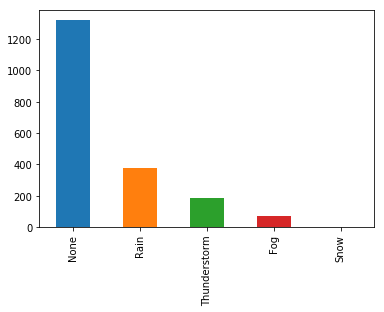

In [4]:
weather.groupby(['Rain','Fog','Snow'],as_index=False).agg('sum')
events=weather[['None','Rain','Fog','Snow','Thunderstorm']].sum(axis=0)
events.sort_values(ascending=False).plot(kind='bar')
events

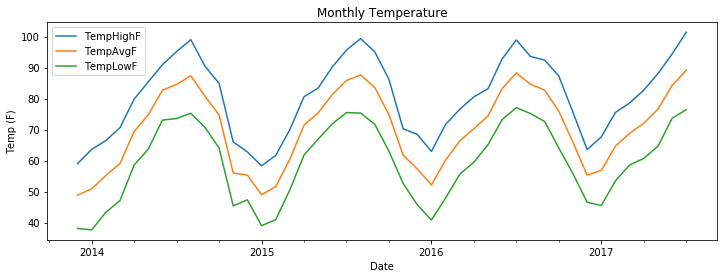

In [5]:
weather[['TempHighF', 'TempAvgF', 'TempLowF']].resample('M').mean().plot(title='Monthly Temperature', figsize=(12,4))
plt.ylabel('Temp (F)')
plt.show()

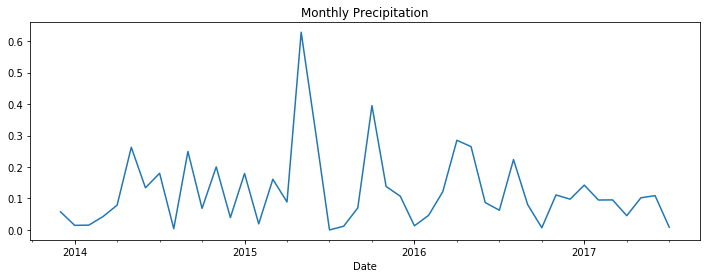

In [6]:
weather['PrecipitationSumInches']=pd.to_numeric(weather['PrecipitationSumInches'],errors='coerce')
weather['PrecipitationSumInches'].resample('M').mean().plot(title='Monthly Precipitation', figsize=(12, 4))
plt.show()

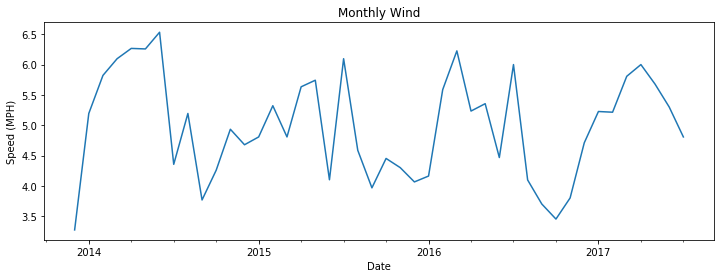

In [7]:
weather['WindAvgMPH']=pd.to_numeric(weather['WindAvgMPH'],errors='coerce')
weather['WindAvgMPH'].resample('M').mean().plot(title='Monthly Wind', figsize=(12,4))
plt.ylabel('Speed (MPH)')
plt.show()

In [9]:
trips.head()

,bikeid,checkout_time,duration_minutes,end_station_id,end_station_name,month,start_station_id,start_station_name,start_time,subscriber_type,trip_id,year
0,8.0,19:12:00,41,2565.0,Trinity & 6th Street,3.0,2536.0,Waller & 6th St.,2015/3/19 19:12,Walk Up,9900082882,2015.0
1,141.0,2:06:04,6,2570.0,South Congress & Academy,10.0,2494.0,2nd & Congress,2016/10/30 2:06,Local365,12617682,2016.0
2,578.0,16:28:27,13,2498.0,Convention Center / 4th St. @ MetroRail,3.0,2538.0,Bullock Museum @ Congress & MLK,2016/3/11 16:28,Local365,9075366,2016.0
3,555.0,15:12:00,80,2712.0,Toomey Rd @ South Lamar,11.0,2497.0,Capitol Station / Congress & 11th,2014/11/23 15:12,24-Hour Kiosk (Austin B-cycle),9900319298,2014.0
4,86.0,15:39:13,25,3377.0,MoPac Pedestrian Bridge @ Veterans Drive,4.0,2707.0,Rainey St @ Cummings,2017/4/16 15:39,Walk Up,14468597,2017.0


In [51]:
ind = pd.DatetimeIndex(trips.start_time)
trips['Date'] = ind.date.astype('datetime64')
trips['hour'] = ind.hour
by_date = trips.pivot_table('trip_id', aggfunc='count',index='Date',columns='subscriber_type', )
by_date = trips.groupby(['Date', 'subscriber_type'])['trip_id'].count()
by_date.name = 'count'
by_date = by_date.reset_index('subscriber_type')
trips_2=trips[trips.year.isin([2014,2015,2016])]
trip_weather=trips_2.merge(weather,left_on='Date',right_on='Date',
                         suffixes=['_trips','_weather']).drop(['SeaLevelPressureAvgInches'],1)
trip_weather.head()

,bikeid,checkout_time,duration_minutes,end_station_id,end_station_name,month,start_station_id,start_station_name,start_time,subscriber_type,...,TempLowF,DewPointAvgF,VisibilityAvgMiles,WindAvgMPH,PrecipitationSumInches,Rain,Fog,Thunderstorm,Snow,None
0,8.0,19:12:00,41,2565.0,Trinity & 6th Street,3.0,2536.0,Waller & 6th St.,2015/3/19 19:12,Walk Up,...,63,64,8,5.0,0.0,0,0,0,0,1
1,62.0,16:12:00,22,2564.0,5th & San Marcos,3.0,2499.0,City Hall / Lavaca & 2nd,2015/3/19 16:12,Walk Up,...,63,64,8,5.0,0.0,0,0,0,0,1
2,195.0,20:12:00,29,1008.0,Nueces @ 3rd,3.0,2563.0,Davis at Rainey Street,2015/3/19 20:12,Walk Up,...,63,64,8,5.0,0.0,0,0,0,0,1
3,728.0,15:12:00,31,2539.0,Convention Center / 3rd & Trinity,3.0,2711.0,Barton Springs @ Kinney Ave,2015/3/19 15:12,Walk Up,...,63,64,8,5.0,0.0,0,0,0,0,1
4,920.0,17:12:00,247,2822.0,East 6th at Robert Martinez,3.0,2575.0,Riverside @ S. Lamar,2015/3/19 17:12,Walk Up,...,63,64,8,5.0,0.0,0,0,0,0,1


## correlation matrix of weather

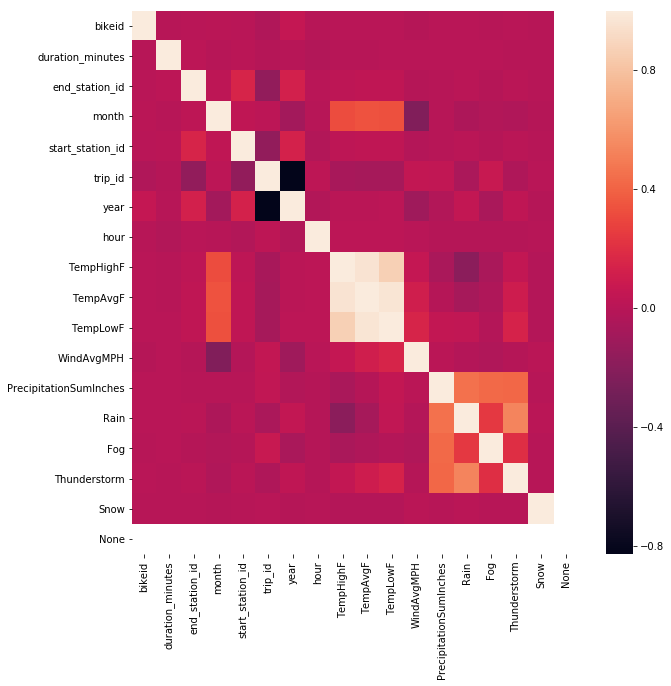

In [11]:
correlation=trip_weather.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlation, ax=ax)

## weather effects to station

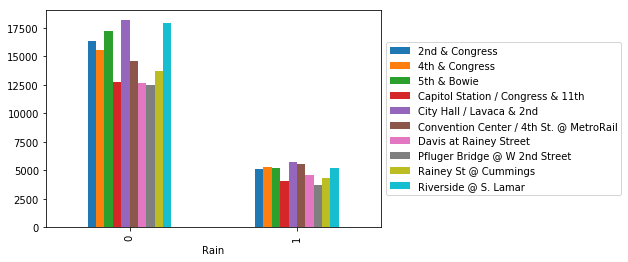

In [12]:
rain_station=trip_weather.groupby('Rain')['start_station_name'].apply(lambda x:x.value_counts().head(10))
fog_station=trip_weather.groupby('Fog')['start_station_name'].apply(lambda x:x.value_counts().head(10))
thunder_station=trip_weather.groupby('Thunderstorm')['start_station_name'].apply(lambda x:x.value_counts().head(10))
temp_station=trip_weather.groupby('TempAvgF')['start_station_name'].apply(lambda x:x.value_counts().head(10))
rain_station.unstack().plot(kind='bar')
plt.legend(loc='center left',bbox_to_anchor=(1.0,0.5))

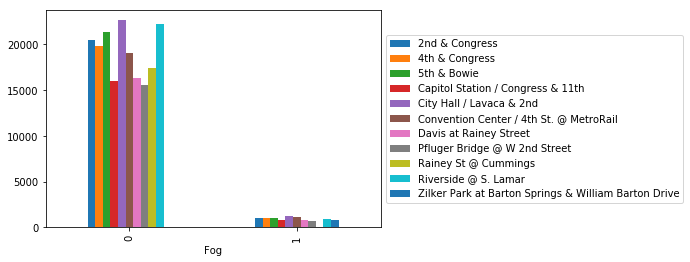

In [13]:
fog_station.unstack().plot(kind='bar')
plt.legend(loc='center left',bbox_to_anchor=(1.0,0.5))

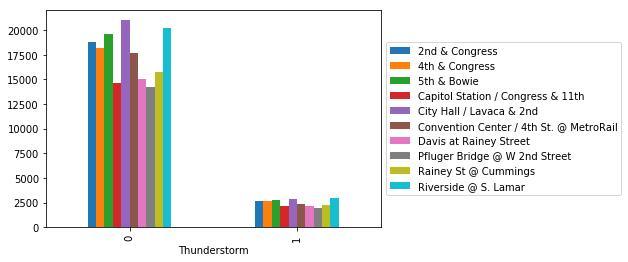

In [14]:
thunder_station.unstack().plot(kind='bar')
plt.legend(loc='center left',bbox_to_anchor=(1.0,0.5))

## Temperature influence on membership

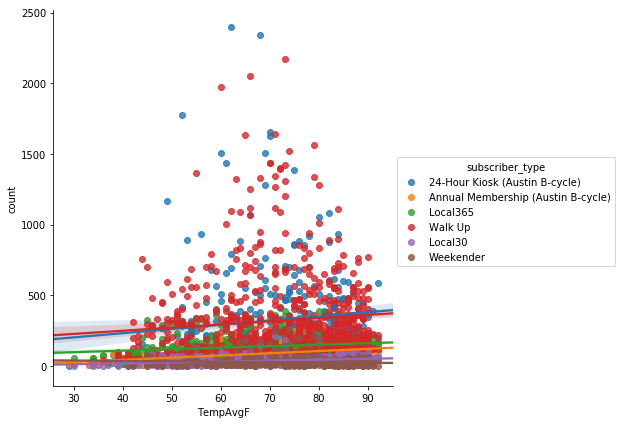

In [15]:
a=trip_weather['subscriber_type'].value_counts().head(6)
trip_weather=trip_weather[trip_weather['subscriber_type'].map(lambda x: x in a)]
trip_weather2=trip_weather.groupby(['Date', 'subscriber_type'])['trip_id'].count()
trip_weather2.name = 'count'
trip_weather2=trip_weather2.reset_index('subscriber_type').join(weather)
g = sns.FacetGrid(trip_weather2, hue='subscriber_type', size=6)
g.map(sns.regplot,"TempAvgF","count")
g.add_legend()

## Precipitation effects on membership

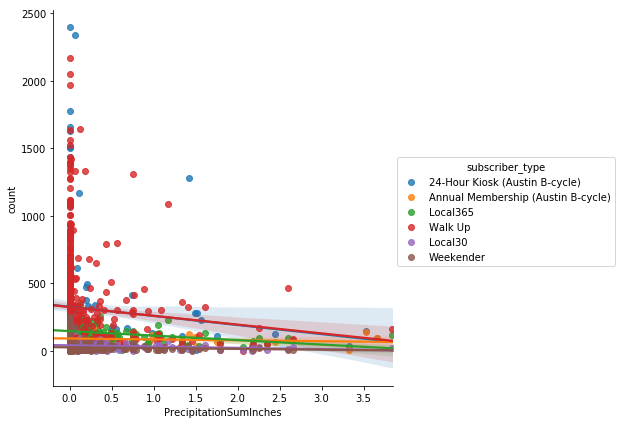

In [16]:
g = sns.FacetGrid(trip_weather2, hue='subscriber_type', size=6)
g.map(sns.regplot,"PrecipitationSumInches","count")
g.add_legend()

In [52]:
trip_weather["start_time"] = trip_weather["start_time"].map(lambda x : datetime.strptime(x, "%Y/%m/%d %H:%M"))
trip_weather["hours"] = trip_weather["start_time"].map(lambda x : x.hour)

In [57]:
trip_weather.hours.head()
val=''
def time_of_day(x):
    global val
    if (x>=6)&(x<10):
        val='morning rush hours'
    elif (x>=15)&(x<19):
        val='afternoon ruch hours'
    elif (x>=10)&(x<15):
        val='noon'
    elif (x>=19)|(x<6):
        val='night'
    return val
trip_weather['Time of the day'] = trip_weather['hours'].apply(lambda a: time_of_day(a))